In [657]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, ("pt_BR",'UTF-8'))

'pt_BR.UTF-8'

In [674]:
log_folder='logs'
topology=["A","B","C","D","A2","D2"]

# Preciso do CB-E Ajustado
# Preciso do DP=I Ajustado

#10 - CB-E Ajsutado = Com Redução

algoritimos = {
    1: "Concurrent",
    2: "FCFS-E",
    3: "DP-E",    
    4: "FCFS-I",
    5: "DP-I",
    7: "CB-E",
    8: "DP-I - Ajustado1", #ModulePlacementEdgewardsIndividually2
    9: "CB-E Ajustado", #ModulePlacementEdgewardsCommunicationAnalysis2
    10: "Novo V1",
    11: "Novo V2",
    12: "LI-X",
}

applications = [
    'VRGame',
    'VSOT'
]

#expertiments_anlysis=[1,2,3,4,5,7,8,9,10,11,12]
# expertiments_anlysis=[5,7,10,9]
expertiments_anlysis=[5,7,11]
expertiments_anlysis=[5,7,12]
cores={
    1:'blue',2:'brown',3:'orange',4:'red',5:'purple',7:'green',8:'blue',9:'blue', 10: 'black',11:'red',12:'orange'}

mobile_users = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mobile_users = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#mobile_users = [8,9,10,11,12,13,14,15,16,17,18,19,20]
#mobile_users = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
simulation_time=2999.0

apps = [1,2]

estilos = {}
for key in cores:
    estilos[algoritimos[key]] = cores[key]

estilos

seeds= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

log_folder='logs'
pdfs=f'charts/'

In [675]:
df_network = pd.DataFrame()

for experiment_number in expertiments_anlysis:    
    for mobile_user in mobile_users:
        for topo in topology:
            for seed in seeds:
                df = pd.read_csv(f'{log_folder}/{topo}/{topo}_{seed}_{experiment_number}_{mobile_user}_network.csv')
                df['Algoritmo'] = algoritimos[experiment_number]
                df['n_user'] = mobile_user
                df['topology'] = topo
                df['seed'] = seed
                if df_network.empty:
                    df_network = df
                else:
                    df_network = pd.concat([df_network,df])        
            
df_network['CurrentNetwork'] = df_network['CurrentNetwork']/1024

In [676]:
df_network[
    (df_network['Algoritmo']=='DP-I')    
    & (df_network['n_user']==0)
    & (df_network['topology']=='D')
    & (df_network['seed']==10)
]

df_network = df_network.groupby(["Algoritmo","n_user", "topology","seed"]).last().reset_index()
df_network    

,Algoritmo,n_user,topology,seed,Time,CurrentNetwork
0,CB-E,0,A,10,2999.00,20.92
1,CB-E,0,A,20,2999.00,22.30
2,CB-E,0,A,30,2999.00,21.26
3,CB-E,0,A,40,2999.00,21.02
4,CB-E,0,A,50,2999.00,20.05
...,...,...,...,...,...,...
2875,LI-X,15,D2,60,2999.00,316.17
2876,LI-X,15,D2,70,2999.00,316.02
2877,LI-X,15,D2,80,2999.00,315.95
2878,LI-X,15,D2,90,2999.00,319.41


In [677]:
df_networkmean_mean = df_network.pivot_table(values="CurrentNetwork",
                      index=['Algoritmo','topology','seed'],
                      aggfunc=np.mean
                      ).reset_index().pivot_table(
    values="CurrentNetwork",
    index=['Algoritmo','topology'],
    aggfunc=np.mean
).reset_index()

df_networkmean_mean_std = df_network.pivot_table(values="CurrentNetwork",
                      index=['Algoritmo','topology','seed'],
                      aggfunc=np.mean
                      ).reset_index().pivot_table(
    values="CurrentNetwork",
    index=['Algoritmo','topology'],
    aggfunc=np.std
).reset_index()

df_networkmean_mean_std

,Algoritmo,topology,CurrentNetwork
0,CB-E,A,1.27
1,CB-E,A2,2.57
2,CB-E,B,1.96
3,CB-E,C,1.35
4,CB-E,D,1.35
5,CB-E,D2,2.67
6,DP-I,A,1.41
7,DP-I,A2,2.15
8,DP-I,B,2.10
9,DP-I,C,1.16


#NetWork Usage Chart by Topology

Topologia:A
           CurrentNetwork   LI-X  DIFF
Algoritmo                             
CB-E               183.57 130.95 28.66
DP-I               201.21 130.95 34.92
LI-X               130.95 130.95  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 0.66 & 0.67 & 0.67 & 0.67 & 0.68 & 1.67 & 1.69 & 1.70 & 1.72 & 1.72 & 1.74 & 1.76 & 1.53 & 1.65 & 1.74 & 1.66 \\
DP-I      & 0.66 & 0.67 & 0.68 & 1.04 & 1.23 & 1.22 & 1.53 & 1.53 & 1.72 & 1.72 & 1.77 & 1.98 & 1.94 & 2.21 & 2.44 & 2.50 \\
LI-X      & 0.66 & 0.67 & 0.67 & 0.67 & 0.67 & 0.68 & 0.67 & 1.06 & 1.09 & 1.27 & 1.58 & 1.75 & 1.78 & 1.80 & 1.79 & 1.97 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


Topologia:B
           CurrentNetwork   LI-X  DIFF
Algoritmo                             
CB-E               305.29 268.64 12.01
DP-I               326.80 268.64 17.80
LI-X               268.64 268.64  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 0.99 & 0.99 & 1.07 & 1.06 & 1.10 & 2.15 & 2.23 & 2.25 & 2.33 & 2.40 & 2.51 & 2.67 & 2.40 & 2.59 & 2.81 & 2.76 \\
DP-I      & 0.97 & 1.00 & 1.05 & 1.35 & 1.59 & 1.63 & 1.99 & 2.04 & 2.33 & 2.35 & 2.58 & 2.80 & 2.83 & 3.24 & 3.40 & 3.43 \\
LI-X      & 0.97 & 1.00 & 1.03 & 1.04 & 1.05 & 1.06 & 1.13 & 1.54 & 1.63 & 1.84 & 2.31 & 2.64 & 2.78 & 2.93 & 2.93 & 3.10 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


Topologia:C
           CurrentNetwork  LI-X  DIFF
Algoritmo                            
CB-E               197.04 78.67 60.08
DP-I               151.21 78.67 47.98
LI-X                78.67 78.67  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 0.76 & 0.73 & 0.74 & 0.74 & 0.74 & 0.74 & 1.83 & 1.80 & 1.82 & 1.82 & 1.85 & 1.90 & 1.72 & 1.80 & 1.91 & 1.80 \\
DP-I      & 0.66 & 0.68 & 0.71 & 0.71 & 0.72 & 0.73 & 0.74 & 1.13 & 1.38 & 1.39 & 1.70 & 1.71 & 1.89 & 1.91 & 2.12 & 2.02 \\
LI-X      & 0.66 & 0.67 & 0.69 & 0.66 & 0.70 & 0.71 & 0.71 & 0.72 & 0.75 & 0.72 & 0.73 & 0.80 & 0.82 & 1.25 & 1.48 & 1.72 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


Topologia:D
           CurrentNetwork  LI-X  DIFF
Algoritmo                            
CB-E               193.64 68.66 64.55
DP-I                99.92 68.66 31.29
LI-X                68.66 68.66  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 0.93 & 0.73 & 0.74 & 0.74 & 0.74 & 0.74 & 0.90 & 1.78 & 1.81 & 1.64 & 1.71 & 1.86 & 1.95 & 2.03 & 2.15 & 2.06 \\
DP-I      & 0.66 & 0.67 & 0.71 & 0.70 & 0.76 & 0.77 & 0.77 & 0.80 & 0.87 & 0.83 & 0.90 & 0.95 & 0.99 & 1.36 & 1.59 & 1.41 \\
LI-X      & 0.66 & 0.67 & 0.69 & 0.66 & 0.70 & 0.71 & 0.71 & 0.72 & 0.76 & 0.72 & 0.78 & 0.84 & 0.90 & 0.97 & 0.97 & 0.95 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


Topologia:A2
           CurrentNetwork   LI-X  DIFF
Algoritmo                             
CB-E               405.94 247.99 38.91
DP-I               317.03 247.99 21.78
LI-X               247.99 247.99  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 2.77 & 2.19 & 2.20 & 2.21 & 2.21 & 2.20 & 2.77 & 2.39 & 2.52 & 2.60 & 2.67 & 2.81 & 2.93 & 2.97 & 3.03 & 2.98 \\
DP-I      & 1.71 & 1.63 & 1.73 & 1.73 & 1.89 & 2.08 & 2.19 & 2.17 & 2.33 & 2.40 & 2.43 & 2.58 & 2.64 & 2.62 & 2.75 & 2.52 \\
LI-X      & 0.66 & 0.67 & 1.05 & 1.22 & 1.52 & 1.67 & 1.69 & 1.70 & 1.95 & 2.10 & 1.96 & 2.13 & 2.16 & 2.44 & 2.58 & 2.49 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


Topologia:D2
           CurrentNetwork   LI-X  DIFF
Algoritmo                             
CB-E               416.37 155.30 62.70
DP-I               225.20 155.30 31.04
LI-X               155.30 155.30  0.00
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
Usuários &   0  &   1  &   2  &   3  &   4  &   5  &   6  &   7  &   8  &   9  &   10 &   11 &   12 &   13 &   14 &   15 \\
Algoritmo &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      &      \\
\midrule
CB-E      & 2.76 & 2.68 & 2.23 & 2.25 & 2.24 & 2.67 & 2.78 & 2.88 & 2.57 & 2.62 & 2.68 & 2.84 & 2.89 & 2.96 & 3.07 & 2.98 \\
DP-I      & 0.77 & 0.77 & 0.79 & 1.16 & 1.16 & 1.38 & 1.41 & 1.66 & 1.74 & 1.87 & 1.93 & 2.12 & 2.08 & 2.34 & 2.52 & 2.35 \\
LI-X      & 0.68 & 0.73 & 0.76 & 0.76 & 0.78 & 0.86 & 0.87 & 0.89 & 0.92 & 1.27 & 1.50 & 1.79 & 1.91 & 1.95 & 2.00 & 1.81 \\
\bottomrule
\end{tabular}



<ipython-input-678-df94318c9424>:75: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,


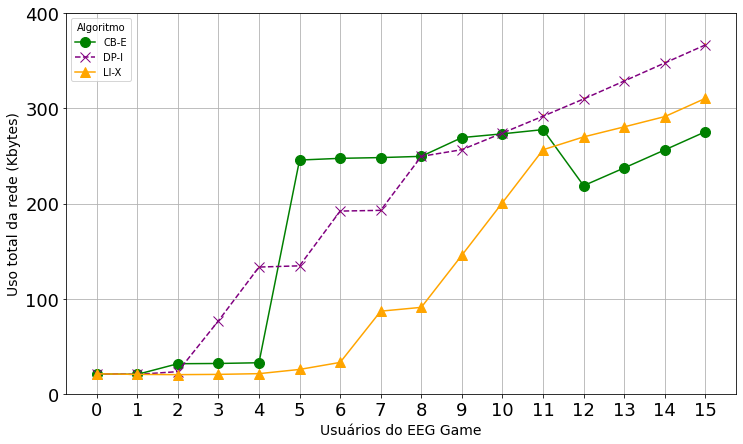

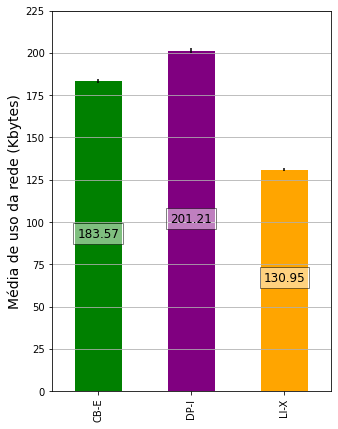

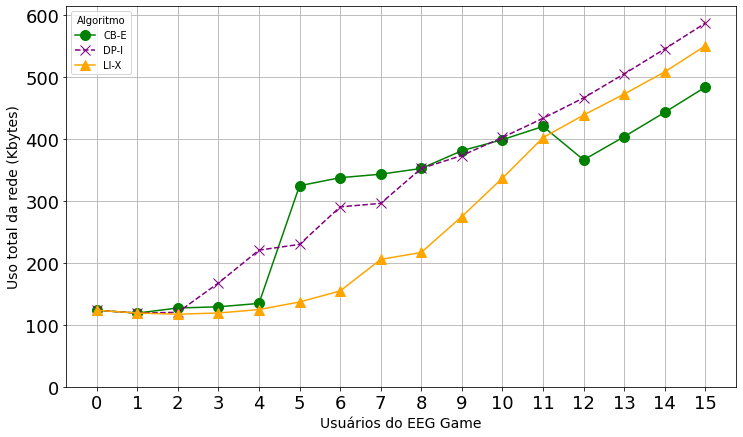

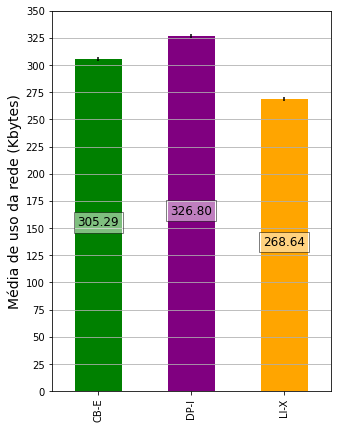

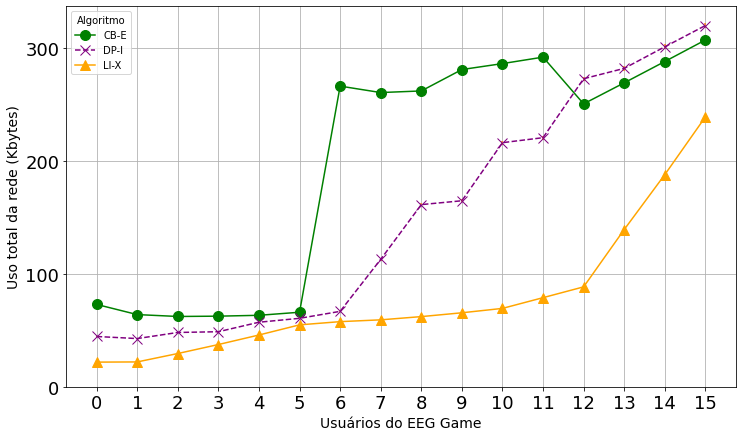

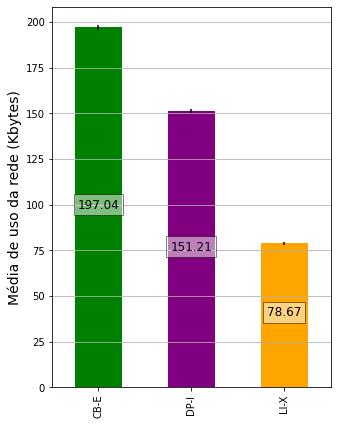

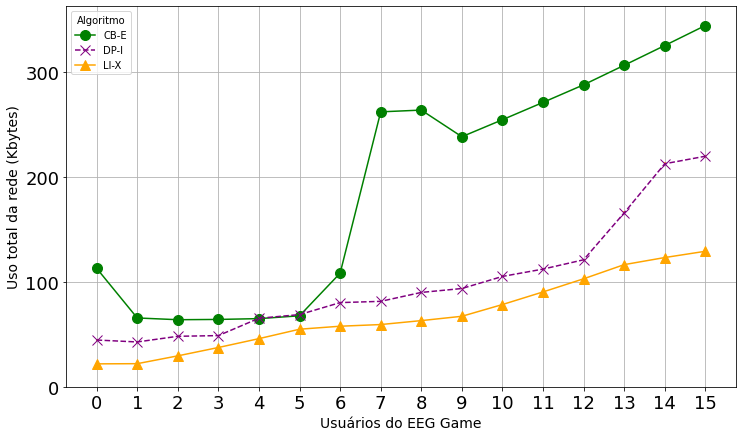

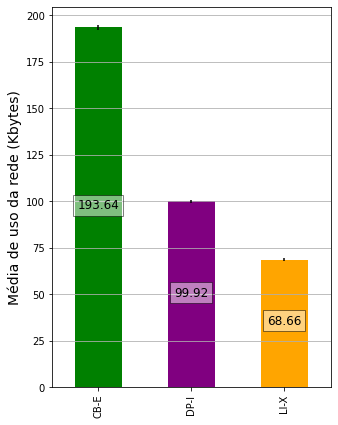

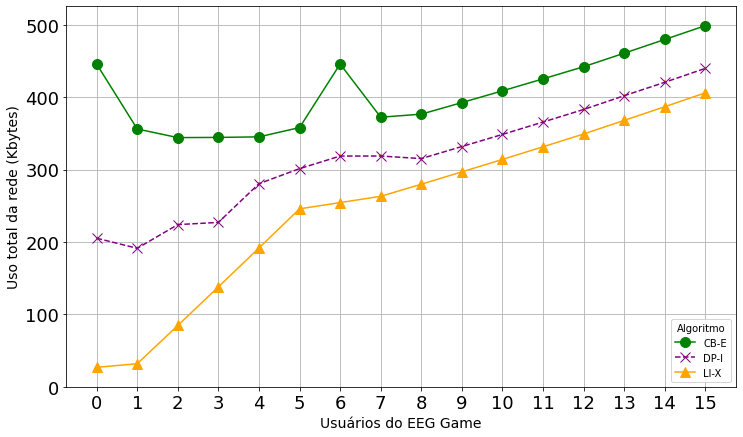

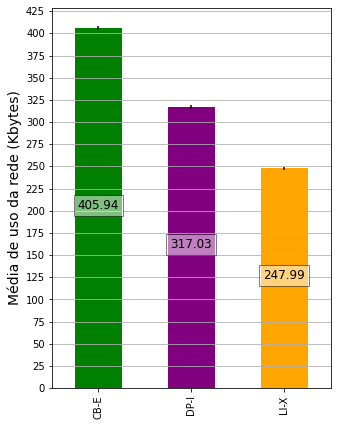

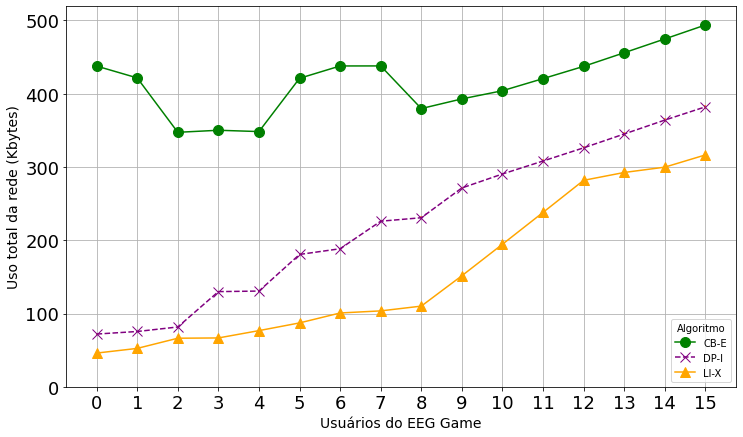

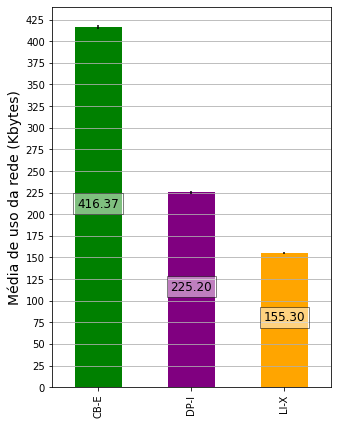

In [678]:
for top in topology:
    df_network_t = df_network[df_network['topology']==top]
    df_network_t = df_network_t[["CurrentNetwork","Algoritmo","n_user", "topology","seed"]]
    df_network_t = df_network_t.groupby(["Algoritmo","n_user", "topology"]).agg({'CurrentNetwork':['mean','std']}).reset_index()
    df_network_t.columns = [col[0]+col[1] for col in df_network_t.columns.values]
    df_network_t

    df_mean = df_network_t \
        .pivot_table(values="CurrentNetworkmean",
                           index=['n_user'],
                           columns=['Algoritmo']
                          )
    df_std = df_network_t \
        .pivot_table(values="CurrentNetworkstd",
                           index=['n_user'],
                           columns=['Algoritmo']
                          )

    fig = plt.figure(figsize=(12,7))
    ax0 = plt.gca()
#     gs = fig.add_gridspec(nrows=1, ncols=3)
#     ax0 = fig.add_subplot(gs[0:2])
#     ax1 = fig.add_subplot(gs[2])

    df_mean.plot(
#         title='Total network usage',
              ax=ax0,
              fontsize=18,         
              markersize=10,
#               figsize=(15,7),
              color=estilos,
              style=["o-","x--","^-","d:",'s--'],
            #yerr=df_std
             )

    ax0.errorbar(df_mean.index, df_mean['CB-E'] , yerr=df_std['CB-E'],ls='none')
    ax0.errorbar(df_mean.index, df_mean['DP-I'] , yerr=df_std['DP-I'],ls='none')
    ax0.errorbar(df_mean.index, df_mean['LI-X'] , yerr=df_std['LI-X'],ls='none')

    ax0.set_xlabel("Usuários do EEG Game", fontsize=14)
    ax0.set_xticks(mobile_users)
    ax0.set_yticks(range(0,int(df_mean.max().max())+50,100))
    ax0.set_ylabel("Uso total da rede (Kbytes)", fontsize=14)
    ax0.grid()

    cores_t= [estilos[algo] for algo in df_mean.columns]
    
    print("Topologia:" + top)
        
    df_temp = df_networkmean_mean[df_networkmean_mean['topology']==top]
    df_temp.index = df_temp['Algoritmo']
    df_temp = df_temp['CurrentNetwork']    
    placern = df_temp["LI-X"]
    df_temp = pd.DataFrame(df_temp)
    df_temp['LI-X'] = placern
    df_temp['DIFF'] = 100-(df_temp['LI-X']*100/df_temp['CurrentNetwork'])
    print(df_temp)    
    df_mean_man = df_temp['CurrentNetwork']  
    
    df_temp_std = df_networkmean_mean_std[df_networkmean_mean_std['topology']==top]
    df_temp_std.index = df_temp_std['Algoritmo']
    df_temp_std = df_temp_std['CurrentNetwork']   
    #print(df_temp_std)
    fig2 = plt.figure(figsize=(5,7))
    ax1 = plt.gca()
    df_mean_man.plot.bar(ax=ax1, color=cores_t,yerr=df_temp_std
#                          title="Network usage mean by Algorithm"
                        )       
    ax1.set(xlabel=None)
    ax1.grid(axis="y")
    ax1.set_yticks(range(0,int(df_mean_man.max())+25,25))
    ax1.set_ylabel("Média de uso da rede (Kbytes)", fontsize=14)
    def addlabels(ax, x,y):
        for i in range(len(x)):
            ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',fontsize=12,
                   Bbox = dict(facecolor = 'white', alpha = .5))

            
    addlabels(ax1,df_mean.columns,df_mean_man.values)            

    df_std.index.name = "Usuários"
    pd.set_option('display.float_format', '{:.2f}'.format)
    print(df_std.T.to_latex(index=True))  
    #print(df_std.T)  
    fig.savefig(pdfs+top+'_netowrk_a.pdf')
    fig2.savefig(pdfs+top+'_netowrk_b.pdf')

In [679]:
df_delay = pd.DataFrame()
def addlabels(ax, x,y):
    for i in range(len(x)):
        ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
               Bbox = dict(facecolor = 'white', alpha = .5))
        
for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        for topo in topology:
            for seed in seeds:
                df = pd.read_csv(f'{log_folder}/{topo}/{topo}_{seed}_{experiment_number}_{mobile_user}_loopsDelays.csv')
                df['Algoritmo'] = algoritimos[experiment_number]
                df['n_user'] = mobile_user
                df['topology'] = topo
                df['seed'] = seed
                if df_delay.empty:
                    df_delay = df
                else:
                    df_delay = pd.concat([df_delay,df])                                        

In [680]:
df_delay['Application'] = np.where(df_delay['Application']=='DCNS','VSOT',df_delay['Application'])
df_delay['Application'] = np.where(df_delay['Application']=='VRGame1','VRGame',df_delay['Application'])
df_delay

,Time,Application,Delay,Loop,LoopString,Algoritmo,n_user,topology,seed
0,2999.00,VRGame0,23.31,3,EEG_0 | client_0 | concentration_calculator_0 ...,DP-I,0,A,10
1,2999.00,VSOT,5.98,1,motion_detector | object_detector | object_tra...,DP-I,0,A,10
2,2999.00,VSOT,5.11,2,object_tracker | PTZ_CONTROL,DP-I,0,A,10
3,2999.00,VRGame2,23.30,4,EEG_2 | client_2 | concentration_calculator_2 ...,DP-I,0,A,10
0,2999.00,VRGame0,23.69,3,EEG_0 | client_0 | concentration_calculator_0 ...,DP-I,0,A,20
...,...,...,...,...,...,...,...,...,...
1,2999.00,VSOT,180.47,1,motion_detector | object_detector | object_tra...,LI-X,15,D2,90
2,2999.00,VSOT,206.35,2,object_tracker | PTZ_CONTROL,LI-X,15,D2,90
0,2999.00,VRGame,113.91,3,EEG_1 | client_1 | concentration_calculator_1 ...,LI-X,15,D2,100
1,2999.00,VSOT,180.48,1,motion_detector | object_detector | object_tra...,LI-X,15,D2,100


In [681]:
df_delay["app"] =0
df_delay["app"] = np.where(df_delay["Application"]=="VRGame","VR_GAME",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("VSOT"),"VSOT",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("LSWM"),"SWM",df_delay["app"])
df_delay2_ = df_delay[
    (df_delay['Time']==simulation_time) 
    & (df_delay['Application'].isin(applications))    
]

df_delay2_

,Time,Application,Delay,Loop,LoopString,Algoritmo,n_user,topology,seed,app
1,2999.00,VSOT,5.98,1,motion_detector | object_detector | object_tra...,DP-I,0,A,10,VSOT
2,2999.00,VSOT,5.11,2,object_tracker | PTZ_CONTROL,DP-I,0,A,10,VSOT
1,2999.00,VSOT,6.03,1,motion_detector | object_detector | object_tra...,DP-I,0,A,20,VSOT
2,2999.00,VSOT,5.11,2,object_tracker | PTZ_CONTROL,DP-I,0,A,20,VSOT
1,2999.00,VSOT,6.04,1,motion_detector | object_detector | object_tra...,DP-I,0,A,30,VSOT
...,...,...,...,...,...,...,...,...,...,...
1,2999.00,VSOT,180.47,1,motion_detector | object_detector | object_tra...,LI-X,15,D2,90,VSOT
2,2999.00,VSOT,206.35,2,object_tracker | PTZ_CONTROL,LI-X,15,D2,90,VSOT
0,2999.00,VRGame,113.91,3,EEG_1 | client_1 | concentration_calculator_1 ...,LI-X,15,D2,100,VR_GAME
1,2999.00,VSOT,180.48,1,motion_detector | object_detector | object_tra...,LI-X,15,D2,100,VSOT


In [682]:
df_delay2 = df_delay2_.pivot_table(values=['Delay'],
                      index=['n_user','topology','Algoritmo','Application','seed'],                      
                      aggfunc=np.sum
                     ).reset_index()

df_delay2_mean = df_delay2.pivot_table(values=['Delay'],
                      index=['n_user','topology','Algoritmo','Application'],                      
                      aggfunc=np.mean
                     ).reset_index()

df_delay2_std = df_delay2.pivot_table(values=['Delay'],
                      index=['n_user','topology','Algoritmo','Application'],                      
                      aggfunc=np.std,fill_value=0                                   
                     ).reset_index()


df_delay2_menas_std = df_delay2.pivot_table(values=['Delay'],
                      index=['topology','Algoritmo','Application','seed'],                      
                      aggfunc=np.mean
                     ).reset_index().pivot_table(
    values=['Delay'],
    index=['topology','Algoritmo','Application'],
    aggfunc=np.std
).reset_index().pivot_table(values='Delay',columns=['Application'], index=['topology','Algoritmo']).reset_index()

df_delay2_std

,n_user,topology,Algoritmo,Application,Delay
0,0,A,CB-E,VSOT,0.05
1,0,A,DP-I,VSOT,0.05
2,0,A,LI-X,VSOT,0.05
3,0,A2,CB-E,VSOT,0.02
4,0,A2,DP-I,VSOT,0.57
...,...,...,...,...,...
553,15,D2,CB-E,VSOT,0.34
554,15,D2,DP-I,VRGame,7.22
555,15,D2,DP-I,VSOT,7.22
556,15,D2,LI-X,VRGame,5.19


Topologia:A
App:VRGame
           Delay  LI-X  DIFF
Algoritmo                   
CB-E      117.87 30.22 74.36
DP-I       59.93 30.22 49.57
LI-X       30.22 30.22  0.00
App:VSOT
           Delay   LI-X  DIFF
Algoritmo                    
CB-E      230.18 222.38  3.39
DP-I      250.67 222.38 11.29
LI-X      222.38 222.38 -0.00

<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',



Topologia:B
App:VRGame
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       154.2  79.6  48.4
DP-I       105.0  79.6  24.2
LI-X        79.6  79.6   0.0


<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


App:VSOT
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       248.9 242.5   2.6
DP-I       266.6 242.5   9.1
LI-X       242.5 242.5   0.0
Topologia:C
App:VRGame
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       139.3  40.3  71.1
DP-I        52.0  40.3  22.6
LI-X        40.3  40.3   0.0


<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


App:VSOT
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       153.4 131.8  14.1
DP-I       188.9 131.8  30.2
LI-X       131.8 131.8   0.0
Topologia:D
App:VRGame
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       198.9  40.4  79.7
DP-I        52.4  40.4  22.9
LI-X        40.4  40.4   0.0
App:VSOT
           Delay  LI-X  DIFF
Algoritmo                   
CB-E        64.1  81.8 -27.5
DP-I       116.1  81.8  29.6
LI-X        81.8  81.8   0.0

<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',



Topologia:A2
App:VRGame
           Delay  LI-X  DIFF
Algoritmo                   
CB-E       258.0  93.0  64.0
DP-I       160.9  93.0  42.2
LI-X        93.0  93.0   0.0
App:VSOT


<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


           Delay  LI-X  DIFF
Algoritmo                   
CB-E       360.8 346.3   4.0
DP-I       333.2 346.3  -3.9
LI-X       346.3 346.3  -0.0
Topologia:D2
App:VRGame


<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


           Delay  LI-X  DIFF
Algoritmo                   
CB-E       288.3  70.5  75.6
DP-I       102.8  70.5  31.5
LI-X        70.5  70.5   0.0
App:VSOT
           Delay  LI-X   DIFF
Algoritmo                    
CB-E        55.9 255.6 -357.2
DP-I       270.0 255.6    5.4
LI-X       255.6 255.6    0.0


<ipython-input-679-e259f35e2c9d>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


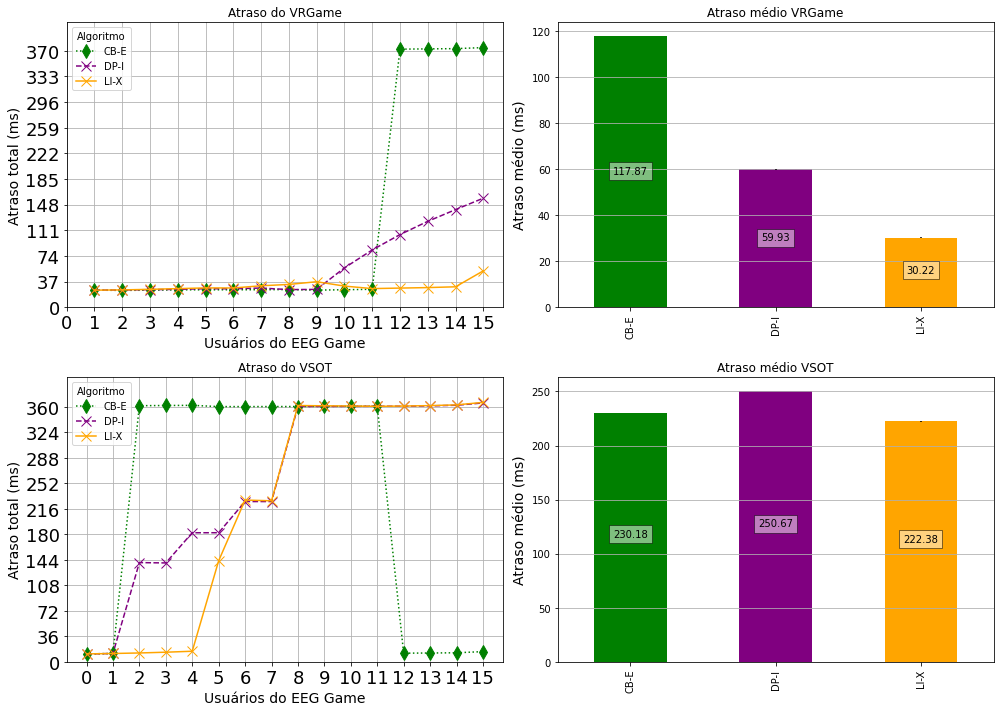

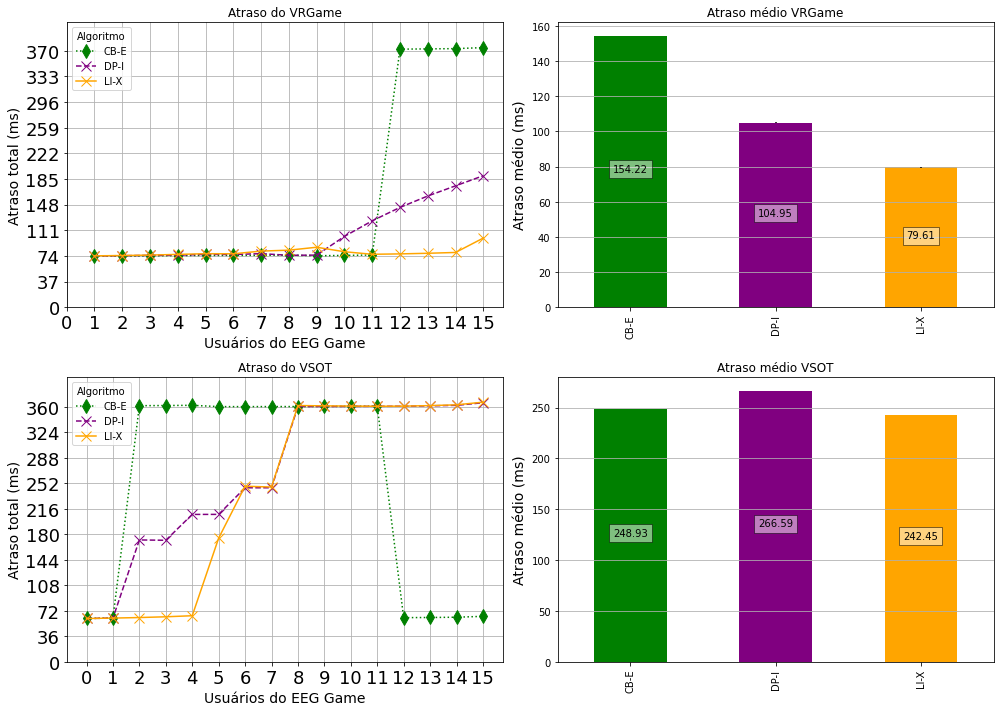

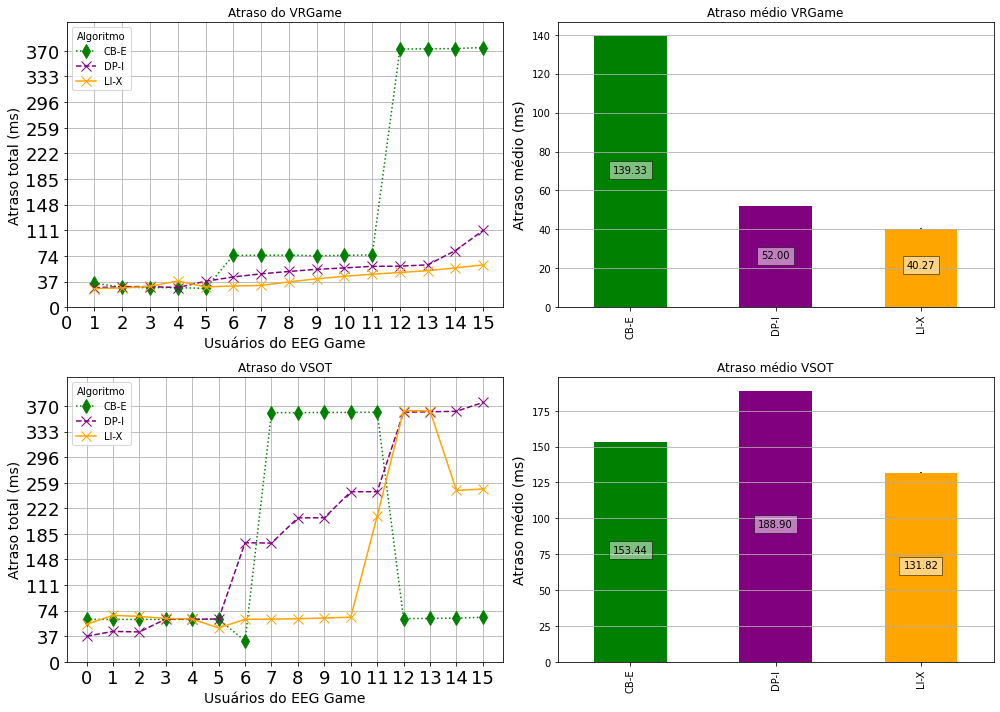

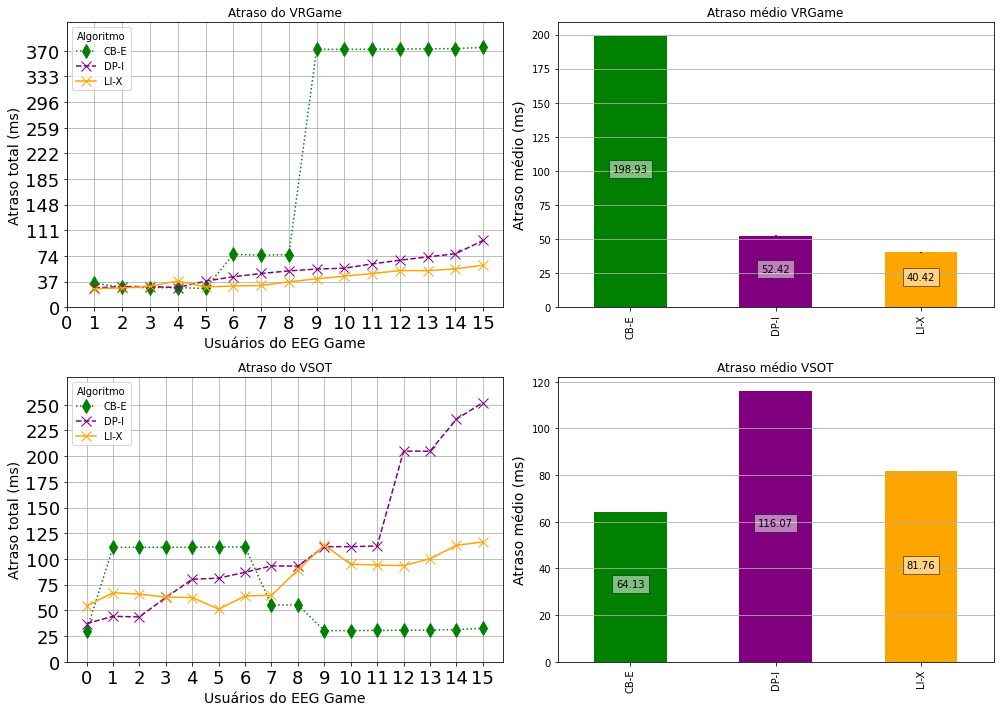

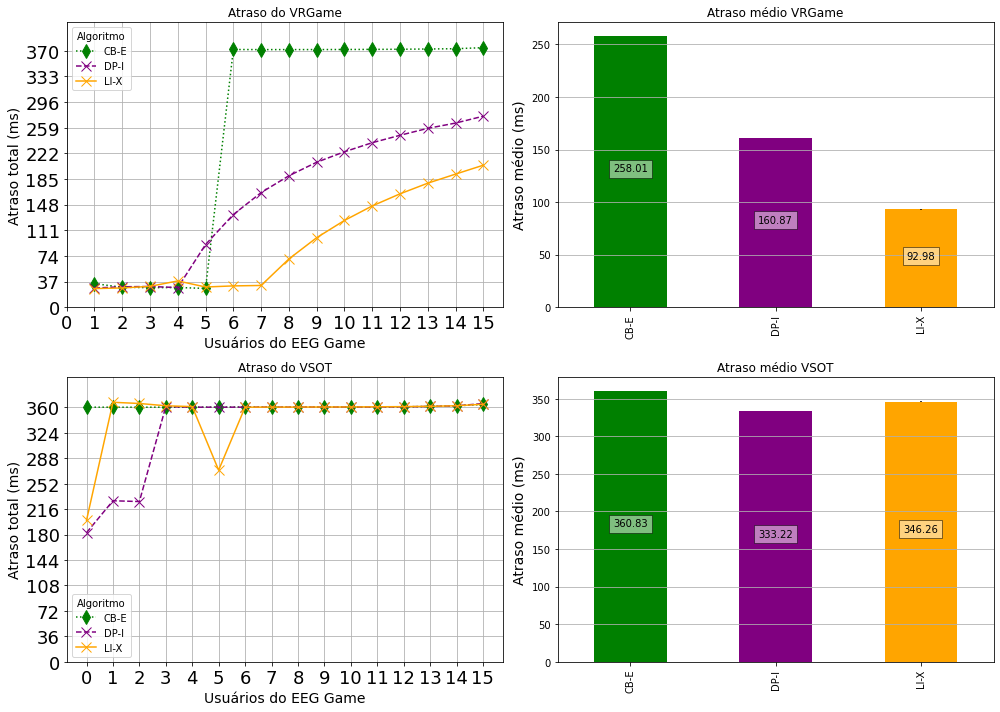

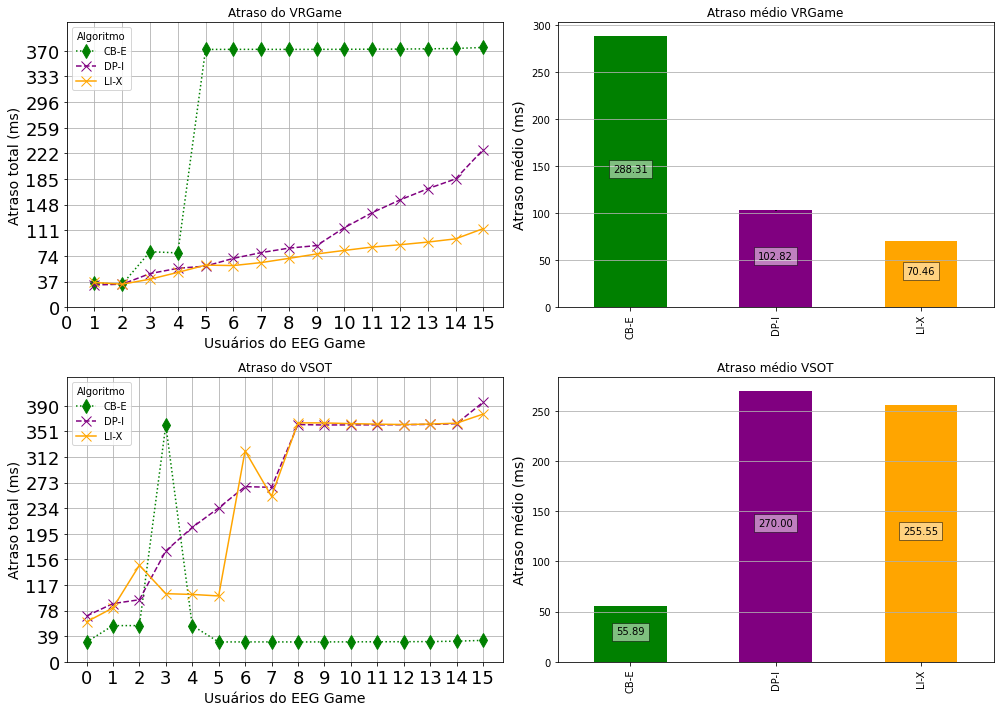

In [683]:
for top in topology:
    print(f'Topologia:{top}')
#for top in ["A"]:
    df_delay2A = df_delay2_mean[df_delay2_mean['topology']==top]
    #df_delay2A.columns = [(c[0]+c[1]).replace("Delay", "") for c in df_delay2A.columns]

    fig, axs = plt.subplots(len(applications),2, figsize=(14,10))


    for key, application in enumerate(applications):
        if df_delay2A[df_delay2A['Application']==application].empty > 0:
            continue

        df_delay_pivot = df_delay2A[df_delay2A['Application']==application].pivot_table(values=['Delay'],
                          index=['n_user'],
                          columns=['Algoritmo'],
                          aggfunc=np.sum
                         )
        df_delay_pivot.columns = df_delay_pivot.columns.get_level_values(1)


        ylim = df_delay_pivot.max().max().astype(np.int64)


        df_delay_pivot.plot(title=f'Atraso do {application}',
                                ax=axs[key,0],
                                fontsize=18,
                                markersize=10,
                                color=estilos,
                                style=["d:","x--","x-","d:",'x--'],
                                ylim=ylim
                         )

        axs[key,0].set_ylabel("Atraso total (ms)", fontsize=14)

        axs[key,0].set_xlabel("Usuários do EEG Game", fontsize=14)
        axs[key,0].set_xticks(mobile_users)
        axs[key,0].set_yticks(range(0,ylim, int(ylim/10)))
        axs[key,0].set_ylim(0, int(ylim*1.1))
        axs[key,0].grid()


        def_delay_mean = df_delay2A[(df_delay2A['Application']==application)].groupby('Algoritmo')['Delay'].mean()


        cores_t = [estilos[algo] for algo in estilos if algo in def_delay_mean.index]

        cores_t= [estilos[algo] for algo in def_delay_mean.index]

        df_t_std = df_delay2_menas_std[df_delay2_menas_std['topology']=="A"][['Algoritmo',application]]
        df_t_std.index = df_t_std['Algoritmo']
        df_t_std = df_t_std[application]

        def_delay_mean.plot.bar(ax=axs[key,1],color=cores_t, title=f'Atraso médio {application}', yerr=df_t_std)    
        axs[key,1].set(xlabel=None)
        axs[key,1].set_ylabel("Atraso médio (ms)", fontsize=14)
        axs[key,1].grid(axis="y")

        addlabels(axs[key,1],def_delay_mean.index,def_delay_mean.values)    
        print(f'App:{application}')
        df_temp = df_delay2A[(df_delay2A['topology']==top)  & (df_delay2A['Application']==application)
                                  ].groupby(['Algoritmo']).mean()
        df_temp = df_temp['Delay']   
        placern = df_temp["LI-X"]
        df_temp = pd.DataFrame(df_temp)
        df_temp["LI-X"] = placern
        df_temp['DIFF'] = 100-(df_temp['LI-X']*100/df_temp['Delay'])
        print(df_temp)
    
    plt.tight_layout()            
    plt.savefig(pdfs+top+'_delay.pdf')
    
    df_delay2_stdA = df_delay2_std[df_delay2_std['topology']==top]
    df_delay2_stdA = df_delay2_stdA.pivot_table(values='Delay', columns=['Algoritmo','Application'],index=['n_user'])
    df_delay2_stdA = df_delay2_stdA.reset_index()
    df_delay2_stdA.index = df_delay2_stdA['n_user']
        
    pd.set_option('display.float_format', '{:.1f}'.format)
    #print(df_delay2_stdA.T.to_latex(index=True))  
    #print(df_delay2_stdA.T)
    

#     placern = df_temp["PLACERN"]
#     df_temp = pd.DataFrame(df_temp)
#     df_temp['PLACERN'] = placern
#     df_temp['DIFF'] = 100-(df_temp['PLACERN']*100/df_temp['CurrentNetwork'])
#     print(df_temp)  

# 

## 

In [684]:
df_network['Carga'] = np.where(df_network['n_user']<=7,"Low","High")
# df_network
df_network['resource'] = np.where(df_network['topology'].isin(["A2","D2"]),"50%","100%")
df_network['topology'] = np.where(df_network['topology']=="A2","A",df_network['topology'])
df_network['topology'] = np.where(df_network['topology']=="D2","D",df_network['topology'])

df_network

,Algoritmo,n_user,topology,seed,Time,CurrentNetwork,Carga,resource
0,CB-E,0,A,10,2999.0,20.9,Low,100%
1,CB-E,0,A,20,2999.0,22.3,Low,100%
2,CB-E,0,A,30,2999.0,21.3,Low,100%
3,CB-E,0,A,40,2999.0,21.0,Low,100%
4,CB-E,0,A,50,2999.0,20.0,Low,100%
...,...,...,...,...,...,...,...,...
2875,LI-X,15,D,60,2999.0,316.2,High,50%
2876,LI-X,15,D,70,2999.0,316.0,High,50%
2877,LI-X,15,D,80,2999.0,316.0,High,50%
2878,LI-X,15,D,90,2999.0,319.4,High,50%


In [685]:
df_network[((df_network['Algoritmo']=='DP-I')|(df_network['Algoritmo']=='LI-X'))
          & ((df_network['topology']=='A')|(df_network['topology']=='D'))].groupby(['resource','Carga','topology','Algoritmo'])['CurrentNetwork'].mean('CurrentNetwork')

resource  Carga  topology  Algoritmo
100%      High   A         DP-I        303.2
                           LI-X        230.8
                 D         DP-I        139.9
                           LI-X         96.3
          Low    A         DP-I         99.3
                           LI-X         31.1
                 D         DP-I         60.0
                           LI-X         41.0
50%       High   A         DP-I        375.8
                           LI-X        341.5
                 D         DP-I        314.8
                           LI-X        235.6
          Low    A         DP-I        258.3
                           LI-X        154.5
                 D         DP-I        135.6
                           LI-X         75.0
Name: CurrentNetwork, dtype: float64

In [687]:
df_delay = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        for seed in seeds:
            for topo in topology:
                df = pd.read_csv(f'{log_folder}/{topo}/{topo}_{seed}_{experiment_number}_{mobile_user}_loopsDelays.csv')
                df['Algoritmo'] = algoritimos[experiment_number]
                df['n_user'] = mobile_user
                df['topology'] = topo
                df['seed'] = seed
                if df_delay.empty:
                    df_delay = df
                else:
                    df_delay = pd.concat([df_delay,df])

        
df_delay['Application'] = np.where(df_delay['Application']=='DCNS','VSOT',df_delay['Application'])
df_delay['Application'] = np.where(df_delay['Application']=='VRGame1','VRGame',df_delay['Application'])

df_delay["app"] =0
df_delay["app"] = np.where(df_delay["Application"] == "VRGame","VR_GAME",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("VSOT"),"VSOT",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("LSWM"),"SWM",df_delay["app"])

df_delay2 = df_delay[
    (df_delay['Time']==simulation_time) 
    & (df_delay['Application'].isin(applications))    
]

df_delay2

,Time,Application,Delay,Loop,LoopString,Algoritmo,n_user,topology,seed,app
1,2999.0,VSOT,6.0,1,motion_detector | object_detector | object_tra...,DP-I,0,A,10,VSOT
2,2999.0,VSOT,5.1,2,object_tracker | PTZ_CONTROL,DP-I,0,A,10,VSOT
1,2999.0,VSOT,31.0,1,motion_detector | object_detector | object_tra...,DP-I,0,B,10,VSOT
2,2999.0,VSOT,30.1,2,object_tracker | PTZ_CONTROL,DP-I,0,B,10,VSOT
1,2999.0,VSOT,19.3,1,motion_detector | object_detector | object_tra...,DP-I,0,C,10,VSOT
...,...,...,...,...,...,...,...,...,...,...
1,2999.0,VSOT,180.1,1,motion_detector | object_detector | object_tra...,LI-X,15,A2,100,VSOT
2,2999.0,VSOT,184.3,2,object_tracker | PTZ_CONTROL,LI-X,15,A2,100,VSOT
0,2999.0,VRGame,113.9,3,EEG_1 | client_1 | concentration_calculator_1 ...,LI-X,15,D2,100,VR_GAME
1,2999.0,VSOT,180.5,1,motion_detector | object_detector | object_tra...,LI-X,15,D2,100,VSOT


In [688]:
df_delay2['Carga'] = np.where(df_delay2['n_user']<=7,"Low","High")

df_delay2['resource'] = np.where(df_delay2['topology'].isin(["A2","D2"]),"50%","100%")
df_delay2['topology'] = np.where(df_delay2['topology']=="A2","A",df_delay2['topology'])
df_delay2['topology'] = np.where(df_delay2['topology']=="D2","D",df_delay2['topology'])
df_delay2

<ipython-input-688-f3e8407d3bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay2['Carga'] = np.where(df_delay2['n_user']<=7,"Low","High")
<ipython-input-688-f3e8407d3bdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay2['resource'] = np.where(df_delay2['topology'].isin(["A2","D2"]),"50%","100%")
<ipython-input-688-f3e8407d3bdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Time,Application,Delay,Loop,LoopString,Algoritmo,n_user,topology,seed,app,Carga,resource
1,2999.0,VSOT,6.0,1,motion_detector | object_detector | object_tra...,DP-I,0,A,10,VSOT,Low,100%
2,2999.0,VSOT,5.1,2,object_tracker | PTZ_CONTROL,DP-I,0,A,10,VSOT,Low,100%
1,2999.0,VSOT,31.0,1,motion_detector | object_detector | object_tra...,DP-I,0,B,10,VSOT,Low,100%
2,2999.0,VSOT,30.1,2,object_tracker | PTZ_CONTROL,DP-I,0,B,10,VSOT,Low,100%
1,2999.0,VSOT,19.3,1,motion_detector | object_detector | object_tra...,DP-I,0,C,10,VSOT,Low,100%
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2999.0,VSOT,180.1,1,motion_detector | object_detector | object_tra...,LI-X,15,A,100,VSOT,High,50%
2,2999.0,VSOT,184.3,2,object_tracker | PTZ_CONTROL,LI-X,15,A,100,VSOT,High,50%
0,2999.0,VRGame,113.9,3,EEG_1 | client_1 | concentration_calculator_1 ...,LI-X,15,D,100,VR_GAME,High,50%
1,2999.0,VSOT,180.5,1,motion_detector | object_detector | object_tra...,LI-X,15,D,100,VSOT,High,50%


In [689]:
df_t = df_delay2.pivot_table(values='Delay',
                      index=['topology','Carga','resource','n_user','Algoritmo','seed'],
                      columns='Application',
                      aggfunc=np.sum
                     ).reset_index()
df_t
#df_t.pivot_table(values=['DCNS','VRGame1'],
#                      index=['topology','Carga','resource','n_user','Algorithm'],
#                      aggfunc=np.mean
#                     ).reset_index()

df_t[((df_t['Algoritmo']=='DP-I')|(df_t['Algoritmo']=='LI-X'))
          & ((df_t['topology']=='A')|(df_t['topology']=='D'))].groupby(['resource','Carga','topology','Algoritmo'])['VSOT','VRGame'].mean(['DCNS','VRGame1'])

<ipython-input-689-1733ecc2cc05>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_t[((df_t['Algoritmo']=='DP-I')|(df_t['Algoritmo']=='LI-X'))


Application                        VSOT  VRGame
resource Carga topology Algoritmo              
100%     High  A        DP-I      361.4    89.7
                        LI-X      362.0    33.1
               D        DP-I      165.9    67.5
                        LI-X      102.0    49.1
         Low   A        DP-I      139.9    25.9
                        LI-X       82.7    26.9
               D        DP-I       66.2    35.2
                        LI-X       61.6    30.5
50%      High  A        DP-I      361.5   238.5
                        LI-X      361.5   147.6
               D        DP-I      365.7   145.5
                        LI-X      364.8    89.0
         Low   A        DP-I      305.0    72.1
                        LI-X      331.0    30.6
               D        DP-I      174.3    54.1
                        LI-X      146.3    49.2

In [690]:
df_t.groupby(['resource','Carga','topology','Algoritmo']).mean()

Application                        n_user  seed  VRGame  VSOT
resource Carga topology Algoritmo                            
100%     High  A        CB-E         11.5  55.0   199.3 186.7
                        DP-I         11.5  55.0    89.7 361.4
                        LI-X         11.5  55.0    33.1 362.0
               B        CB-E         11.5  55.0   224.0 211.8
                        DP-I         11.5  55.0   130.8 361.5
                        LI-X         11.5  55.0    82.3 362.0
               C        CB-E         11.5  55.0   224.2 212.0
                        DP-I         11.5  55.0    66.9 296.1
                        LI-X         11.5  55.0    48.8 203.2
               D        CB-E         11.5  55.0   335.7  34.0
                        DP-I         11.5  55.0    67.5 165.9
                        LI-X         11.5  55.0    49.1 102.0
         Low   A        CB-E          3.5  55.0    24.9 273.6
                        DP-I          3.5  55.0    25.9 139.9
                        LI-X          3.5  55.0    26.9  82.7
               B        CB-E          3.5  55.0    74.4 286.1
                        DP-I          3.5  55.0    75.4 171.7
                        LI-X          3.5  55.0    76.5 122.9
               C        CB-E          3.5  55.0    42.4  94.9
                        DP-I          3.5  55.0    35.0  81.7
                        LI-X          3.5  55.0    30.5  60.5
               D        CB-E          3.5  55.0    42.6  94.3
                        DP-I          3.5  55.0    35.2  66.2
                        LI-X          3.5  55.0    30.5  61.6
50%      High  A        CB-E         11.5  55.0   372.5 361.3
                        DP-I         11.5  55.0   238.5 361.5
                        LI-X         11.5  55.0   147.6 361.5
               D        CB-E         11.5  55.0   372.8  30.9
                        DP-I         11.5  55.0   145.5 365.7
                        LI-X         11.5  55.0    89.0 364.8
         Low   A        CB-E          3.5  55.0   127.2 360.3
                        DP-I          3.5  55.0    72.1 305.0
                        LI-X          3.5  55.0    30.6 331.0
               D        CB-E          3.5  55.0   191.8  80.9
                        DP-I          3.5  55.0    54.1 174.3
                        LI-X          3.5  55.0    49.2 146.3

In [692]:
#df_t.groupby(['resource','Carga','topology','Algoritmo']).mean()[('Delay', 'VRGame')].values

In [693]:
#df_t.groupby(['resource','Carga','topology','Algoritmo']).mean()[('Delay', 'DCNS')].values

In [695]:
df_processos_dispositivo = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        for topo in topology:
            for seed in [seeds[0]]:
                df = pd.read_csv(f'{log_folder}/{topo}/{topo}_{seed}_{experiment_number}_{mobile_user}_processoXDispostivo.csv')
                df['Algoritmo'] = algoritimos[experiment_number]
                df['n_user'] = mobile_user
                df['topology'] = topo
                df['seed'] = seed   
                if df_processos_dispositivo.empty:
                    df_processos_dispositivo = df
                else:
                    df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
                    
df_processos_dispositivo['Application'] = np.where(df_processos_dispositivo['Application']=='DCNS','VSOT',df_processos_dispositivo['Application'])
df_processos_dispositivo['Application'] = np.where(df_processos_dispositivo['Application']=='VRGame1','VRGame',df_processos_dispositivo['Application'])
                    
                    
df_processos_dispositivo = df_processos_dispositivo[
    (df_processos_dispositivo['Time']==simulation_time) &
       (
        (df_processos_dispositivo['Application']=='VRGame')  |
        (df_processos_dispositivo['Application']=='VSOT')  |
        (df_processos_dispositivo['Application']=='LSWM')  
    ) &
    (
        (df_processos_dispositivo['Dispostivo']=='cloud') 
        | (df_processos_dispositivo['Dispostivo']=='cloudlet-1')  
        | (df_processos_dispositivo['Dispostivo']=='cloudlet-1-0')  
        | (df_processos_dispositivo['Dispostivo']=='cloudlet-1-0-0') 
    )
]


# df_processos_dispositivo['dispostivo'] = np.where((df_processos_dispositivo['topology']=='C')
#                                                   &(df_processos_dispositivo['dispostivo']=="cloudlet-1"),"cloudlet-2",df_processos_dispositivo['dispostivo'])
# df_processos_dispositivo['dispostivo'] = np.where((df_processos_dispositivo['topology']=='C')
#                                                   &(df_processos_dispositivo['dispostivo']=="cloudlet-1-0"),"cloudlet-1",df_processos_dispositivo['dispostivo'])

# df_processos_dispositivo['dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
#                                                   &(df_processos_dispositivo['dispostivo']=="cloudlet-1"),"cloudlet-3",df_processos_dispositivo['dispostivo'])
# df_processos_dispositivo['dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
#                                                   &(df_processos_dispositivo['dispostivo']=="cloudlet-1-0"),"cloudlet-2",df_processos_dispositivo['dispostivo'])
# df_processos_dispositivo['dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
#                                                   &(df_processos_dispositivo['dispostivo']=="cloudlet-1-0-0"),"cloudlet-1",df_processos_dispositivo['dispostivo'])

df_processos_dispositivo

,Module,Count,Time,Level,Dispostivo,Application,Algoritmo,n_user,topology,seed
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,A,10
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10
10,object_detector,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,B,10
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,B,10
...,...,...,...,...,...,...,...,...,...,...
4,concentration_calculator_1,7,2999.0,2,cloudlet-1,VRGame,LI-X,15,D2,10
5,connector_1,1,2999.0,3,cloudlet-1-0,VRGame,LI-X,15,D2,10
6,concentration_calculator_1,5,2999.0,3,cloudlet-1-0,VRGame,LI-X,15,D2,10
7,connector_1,2,2999.0,4,cloudlet-1-0-0,VRGame,LI-X,15,D2,10


In [696]:
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='C')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1"),"cloudlet-2",df_processos_dispositivo['Dispostivo'])
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='C')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1-0"),"cloudlet-1",df_processos_dispositivo['Dispostivo'])

df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1"),"cloudlet-3",df_processos_dispositivo['Dispostivo'])
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1-0"),"cloudlet-2",df_processos_dispositivo['Dispostivo'])
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1-0-0"),"cloudlet-1",df_processos_dispositivo['Dispostivo'])     


df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D2')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1"),"cloudlet-3",df_processos_dispositivo['Dispostivo'])
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D2')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1-0"),"cloudlet-2",df_processos_dispositivo['Dispostivo'])
df_processos_dispositivo['Dispostivo'] = np.where((df_processos_dispositivo['topology']=='D2')
                                                  &(df_processos_dispositivo['Dispostivo']=="cloudlet-1-0-0"),"cloudlet-1",df_processos_dispositivo['Dispostivo'])     


df_processos_dispositivo["label"] = df_processos_dispositivo["Application"] +"/"+df_processos_dispositivo["Dispostivo"]
df_processos_dispositivo["label2"] = df_processos_dispositivo["Dispostivo"] + "/" +df_processos_dispositivo["Module"]
df_processos_dispositivo

,Module,Count,Time,Level,Dispostivo,Application,Algoritmo,n_user,topology,seed,label,label2
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,A,10,VSOT/cloud,cloud/user_interface
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10,VSOT/cloudlet-1,cloudlet-1/object_tracker
10,object_detector,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10,VSOT/cloudlet-1,cloudlet-1/object_detector
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,B,10,VSOT/cloud,cloud/user_interface
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,B,10,VSOT/cloudlet-1,cloudlet-1/object_tracker
...,...,...,...,...,...,...,...,...,...,...,...,...
4,concentration_calculator_1,7,2999.0,2,cloudlet-3,VRGame,LI-X,15,D2,10,VRGame/cloudlet-3,cloudlet-3/concentration_calculator_1
5,connector_1,1,2999.0,3,cloudlet-2,VRGame,LI-X,15,D2,10,VRGame/cloudlet-2,cloudlet-2/connector_1
6,concentration_calculator_1,5,2999.0,3,cloudlet-2,VRGame,LI-X,15,D2,10,VRGame/cloudlet-2,cloudlet-2/concentration_calculator_1
7,connector_1,2,2999.0,4,cloudlet-1,VRGame,LI-X,15,D2,10,VRGame/cloudlet-1,cloudlet-1/connector_1


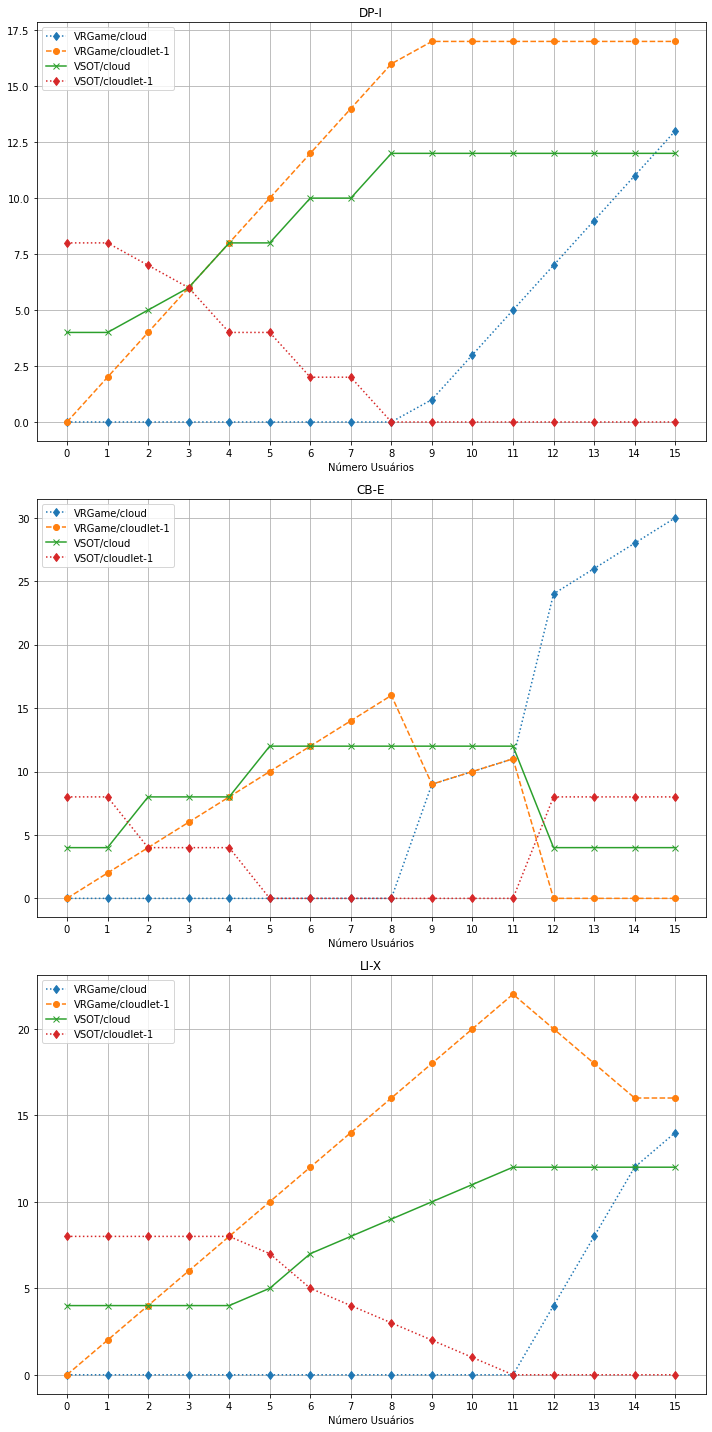

In [697]:
df_processos_dispositivo2 = df_processos_dispositivo[df_processos_dispositivo['topology']=='A']
fig, axs = plt.subplots(len(expertiments_anlysis), 1, figsize=(10,20))


for key, algo in enumerate(expertiments_anlysis):
    df_processos_dispositivo3 = df_processos_dispositivo[(df_processos_dispositivo['Algoritmo']==algoritimos[algo]) & 
                                                         (df_processos_dispositivo['topology']=='A')].pivot_table(
                                     values=['Count'],
                                     index=['n_user'],
                                     columns=['label'],                                     
                                     aggfunc=np.sum
                                     ).fillna(0)
    df_processos_dispositivo3.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
    df_processos_dispositivo3.plot(ax=axs[key],
                                  style=["d:","o--","x-","d:",'s--'],
                                  title=f'{algoritimos[algo]}')
    axs[key].set_xlabel("Número Usuários", fontsize=10)
    axs[key].set_xticks(mobile_users)
    axs[key].grid()    
plt.tight_layout()  

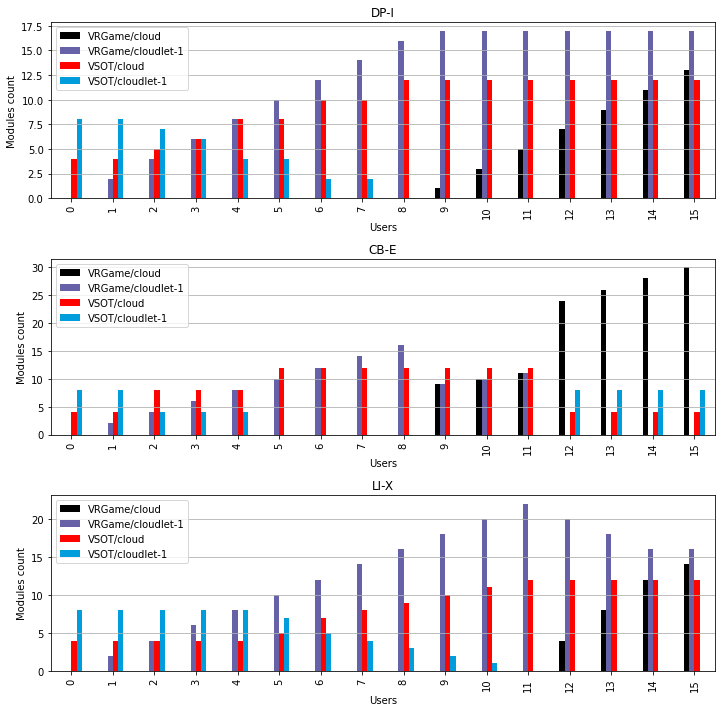

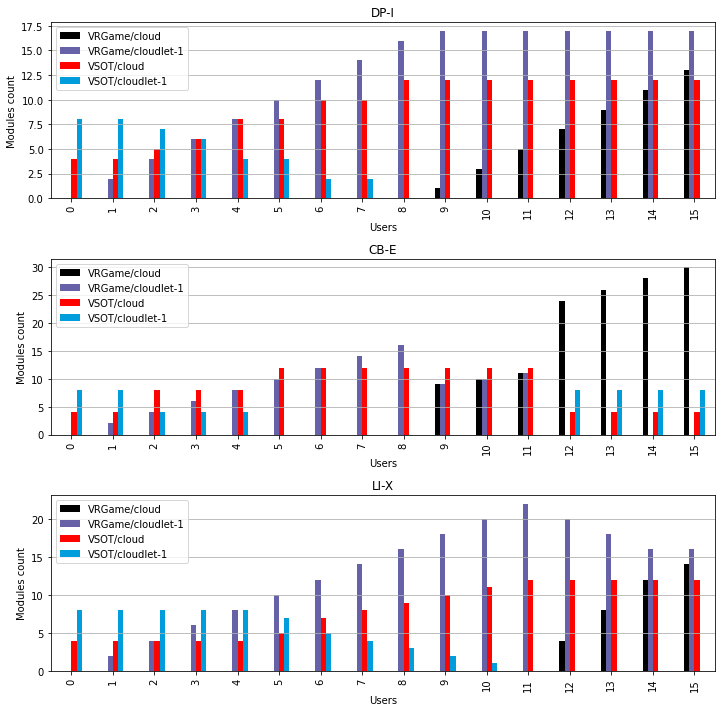

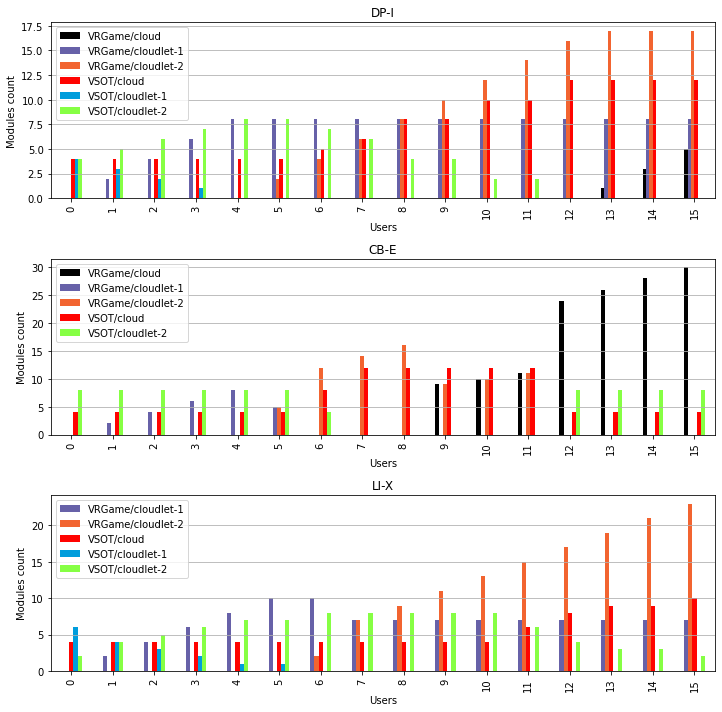

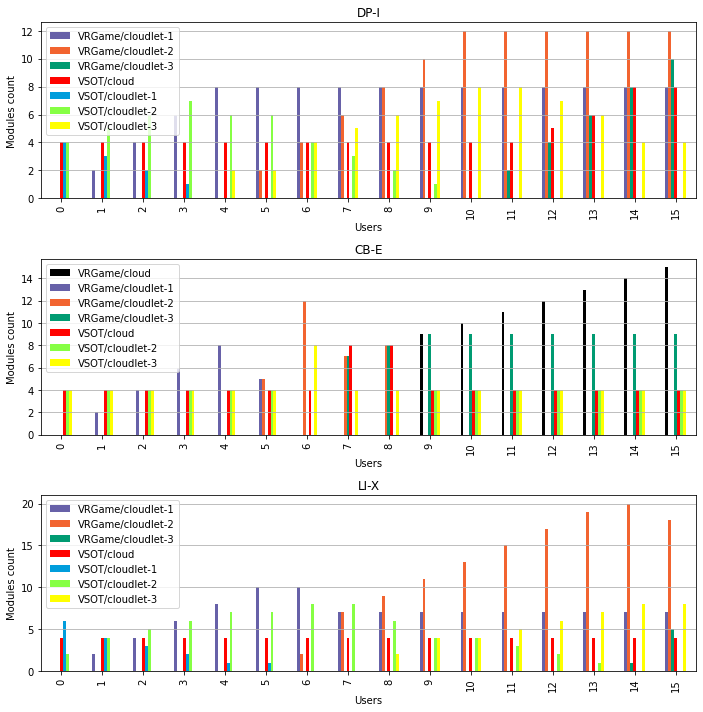

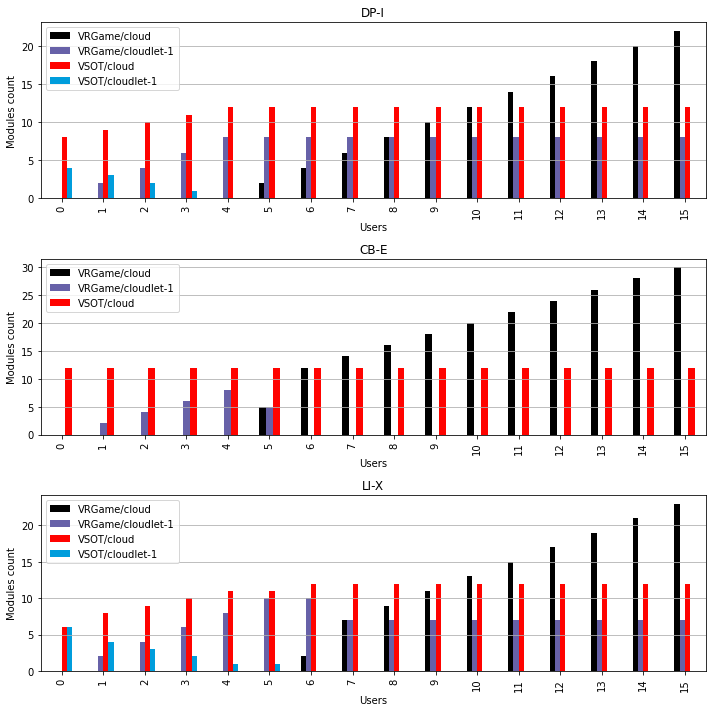

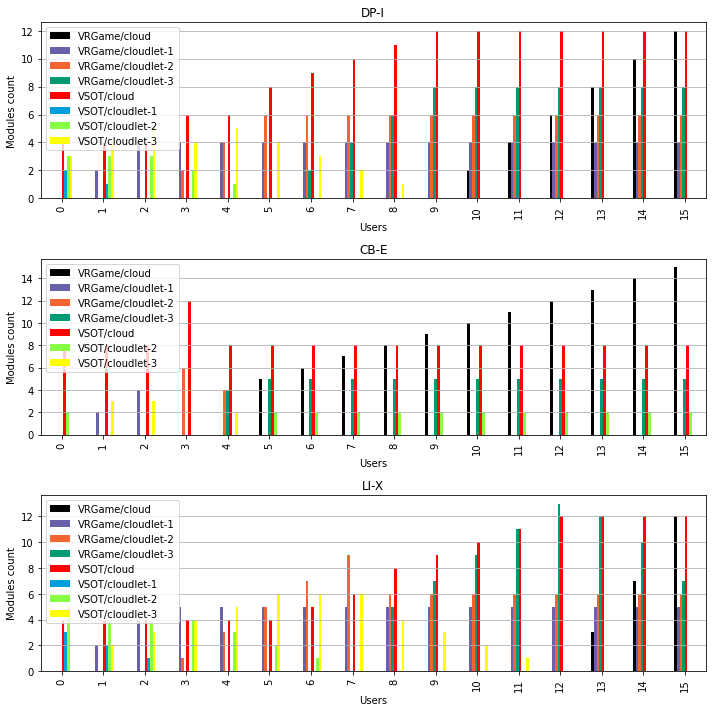

In [713]:
paleta = ['#FF0300','#009DDC','#FFFF00','#F26430','#000000','#6761A8','#86FF44','#009B72','#FF00FF']        
        
colors_map = {
    'VSOT/cloud': paleta[0],
    'VSOT/cloudlet-1': paleta[1],
    'VSOT/cloudlet-3': paleta[2],
    'VSOT/cloudlet-2' : paleta[6],
    'VRGame/cloud': paleta[4],
    'VRGame/cloudlet-1': paleta[5],    
    'VRGame/cloudlet-2': paleta[3], 
    'VRGame/cloudlet-3': paleta[7]
}        

for top in topology:
    fig, axs = plt.subplots(len(expertiments_anlysis), 1, figsize=(10,10))
    for key, algo in enumerate(expertiments_anlysis):
        df_processos_dispositivo3 = df_processos_dispositivo[(df_processos_dispositivo['Algoritmo']==algoritimos[algo]) & 
                                                             (df_processos_dispositivo['topology']==top)].pivot_table(
                                         values=['Count'],
                                         index=['n_user'],
                                         columns=['label'],                                     
                                         aggfunc=np.sum
                                         ).fillna(0)
        df_processos_dispositivo3.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
        df_processos_dispositivo3.plot.bar(ax=axs[key],
                                      style=["d:","o--","x-","d:",'s--'],
                                      title=f'{algoritimos[algo]}',
                                          color=colors_map)
        axs[key].set_xlabel("Users", fontsize=10)
        #axs[key].set_xticks(mobile_users)
        axs[key].grid(axis='y')    
        axs[key].set_ylabel("Modules count", fontsize=10)
        plt.tight_layout()  
        plt.savefig(pdfs+top+'_modules_all_count.pdf')

In [704]:
df_processos_dispositivo

,Module,Count,Time,Level,Dispostivo,Application,Algoritmo,n_user,topology,seed,label,label2
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,A,10,VSOT/cloud,cloud/user_interface
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10,VSOT/cloudlet-1,cloudlet-1/object_tracker
10,object_detector,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,A,10,VSOT/cloudlet-1,cloudlet-1/object_detector
0,user_interface,4,2999.0,0,cloud,VSOT,DP-I,0,B,10,VSOT/cloud,cloud/user_interface
9,object_tracker,4,2999.0,2,cloudlet-1,VSOT,DP-I,0,B,10,VSOT/cloudlet-1,cloudlet-1/object_tracker
...,...,...,...,...,...,...,...,...,...,...,...,...
4,concentration_calculator_1,7,2999.0,2,cloudlet-3,VRGame,LI-X,15,D2,10,VRGame/cloudlet-3,cloudlet-3/concentration_calculator_1
5,connector_1,1,2999.0,3,cloudlet-2,VRGame,LI-X,15,D2,10,VRGame/cloudlet-2,cloudlet-2/connector_1
6,concentration_calculator_1,5,2999.0,3,cloudlet-2,VRGame,LI-X,15,D2,10,VRGame/cloudlet-2,cloudlet-2/concentration_calculator_1
7,connector_1,2,2999.0,4,cloudlet-1,VRGame,LI-X,15,D2,10,VRGame/cloudlet-1,cloudlet-1/connector_1


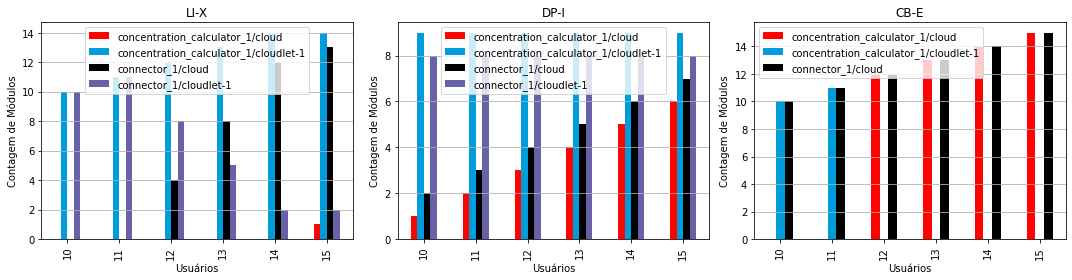

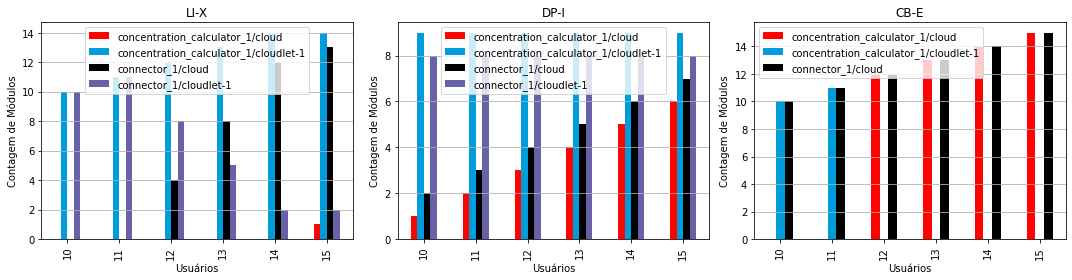

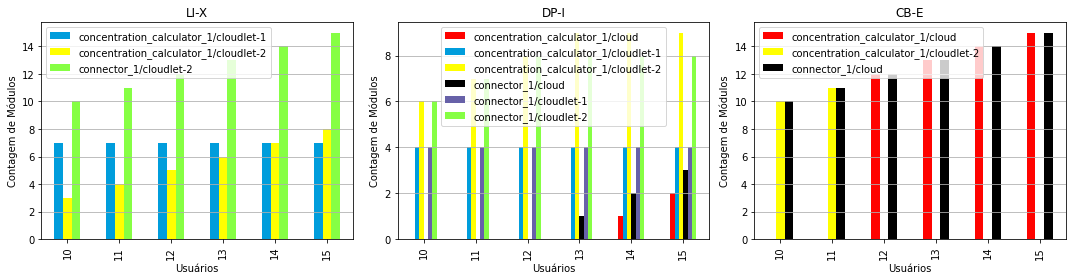

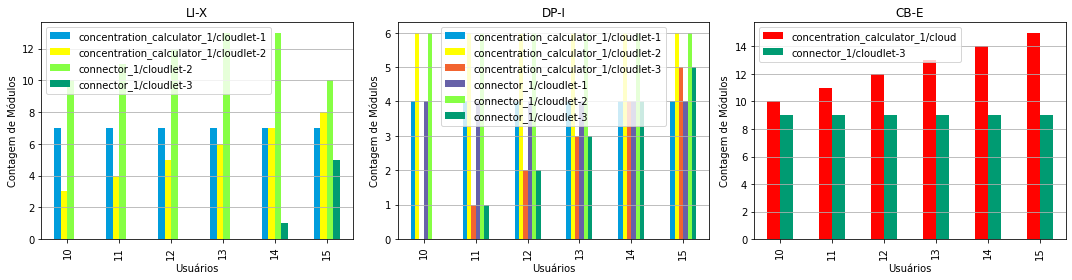

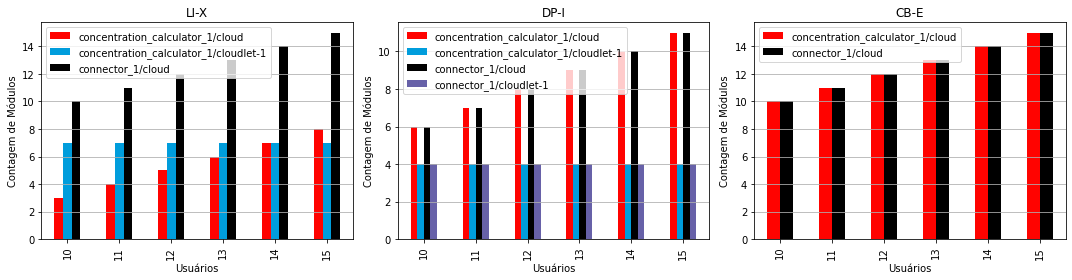

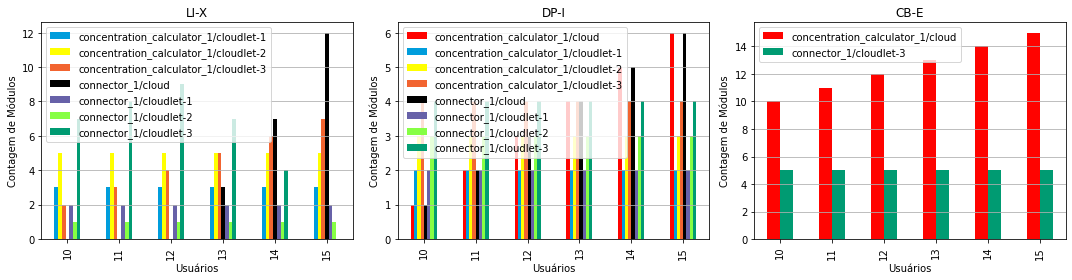

In [712]:
# devicePattensMap = {
#     'cloud': 'oo',
#     'cloudlet-1': '',
#     'cloudlet-1-0': ''
# }

# moduleColorsMap = {
#     'concentration_calculator_1': 'red',
#     'connector_1': 'blue',
#     'object_detector': '#03045e',    
#     'object_tracker': '#00b4d8',
#     'user_interface': '#caf0f8'
# }

# '',
#        ,
       
paleta = ['#FF0300','#009DDC','#FFFF00','#F26430','#000000','#6761A8','#86FF44','#009B72','#FF00FF']            
colors_map = {
    'concentration_calculator_1/cloud': paleta[0],
    'concentration_calculator_1/cloudlet-1': paleta[1],
    'concentration_calculator_1/cloudlet-2': paleta[2],
    'concentration_calculator_1/cloudlet-3': paleta[3],
    'connector_1/cloud' : paleta[4],
    'connector_1/cloudlet-1': paleta[5], 
    'connector_1/cloudlet-2': paleta[6],
    'connector_1/cloudlet-3': paleta[7]
}        


def getPattern(column):
    return [devicePattensMap[p] for p in devicePattensMap.keys() if p in column][0]

def getColor(column):
    return [moduleColorsMap[p] for p in moduleColorsMap.keys() if p in column][0]

for top in topology:
#for top in ['D']:
    fig, axs = plt.subplots(1, 3, figsize=(15,4))

    for key,alg in enumerate(['LI-X','DP-I','CB-E']):
        temp = df_processos_dispositivo[
            (df_processos_dispositivo['topology']==top)
            & ((df_processos_dispositivo['Application']=='VRGame')
            #| (df_processos_dispositivo2['Application']=='DCNS')
            )
        #     & (df_processos_dispositivo2['n_user'] < 12)
            & (df_processos_dispositivo['Algoritmo'] == alg)
            & (df_processos_dispositivo['n_user'] > 9)
        ].pivot_table(
             values=['Count'],
             index=['n_user'],
             columns=['Application','Module','Dispostivo'],                                     
             aggfunc=np.sum
         ).fillna(0)

        temp.columns = [f'{x[2]}/{x[3]}' for x in temp.columns]
        

        #temp.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
        fig = temp.plot.bar(ax=axs[key],
                            style=["d:","o--","x-","d:",'s--'],
                            color=colors_map,
                            title=f'{alg}'
                  )
        #fig.set_xticks(mobile_users)
        fig.set_ylabel("Contagem de Módulos", fontsize=10)
        fig.set_xlabel("Usuários", fontsize=10)
        fig.grid(axis='y')
        plt.tight_layout()  
        plt.savefig(pdfs+top+'vrgame_count.pdf')

In [ ]:
temp = df_processos_dispositivo2[
    ((df_processos_dispositivo2['Application']=='VRGame1')
    #| (df_processos_dispositivo2['Application']=='DCNS')
    )
#     & (df_processos_dispositivo2['n_user'] < 12)
    & (df_processos_dispositivo2['algoritimo'] == 'DP-I')
    & (df_processos_dispositivo2['n_user'] > 10)
].pivot_table(
     values=['Count'],
     index=['n_user'],
     columns=['Application','Module','Dispostivo'],                                     
     aggfunc=np.sum
 ).fillna(0)

#temp.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
fig = temp.plot.bar(figsize=(15, 8),
          style=["d:","o--","x-","d:",'s--']
          )
fig.grid(axis='y')
#fig.set_xticks(mobile_users)
fig